<a href="https://colab.research.google.com/github/WilliamEFonseca/Machine-Learning/blob/main/regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

             Mileage  Age  Repairs               Cost  Predic
0  15515766655801400    9        1  17618005001718600       0
1  12883495868948500   12        5  26556196162914400       1
2   5125289847111740   16        2   8713368536860940       0
3    175438953296527   19        3   6640486325769680       1
4  14776336108007200   15        5  22127996329732000       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Mileage  2000 non-null   int64
 1   Age      2000 non-null   int64
 2   Repairs  2000 non-null   int64
 3   Cost     2000 non-null   int64
 4   Predic   2000 non-null   int64
dtypes: int64(5)
memory usage: 78.2 KB
None
            Mileage          Age      Repairs          Cost       Predic
count  2.000000e+03  2000.000000  2000.000000  2.000000e+03  2000.000000
mean   1.238784e+16    10.030500     4.557500  1.390200e+16     0.702500
std    

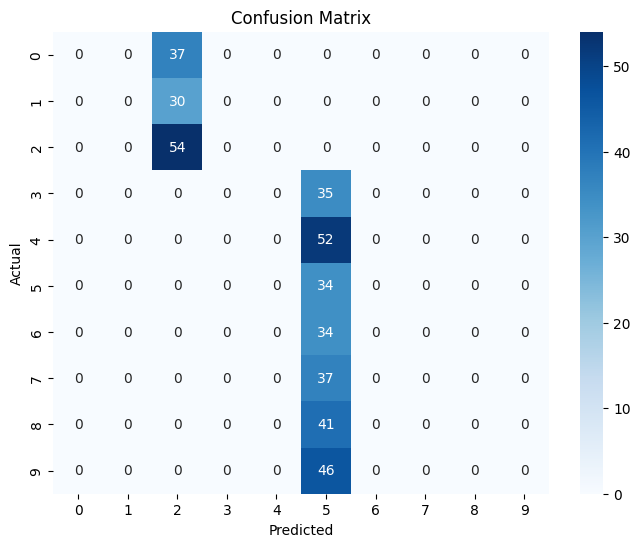

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00        30
           2       0.45      1.00      0.62        54
           3       0.00      0.00      0.00        35
           4       0.00      0.00      0.00        52
           5       0.12      1.00      0.22        34
           6       0.00      0.00      0.00        34
           7       0.00      0.00      0.00        37
           8       0.00      0.00      0.00        41
           9       0.00      0.00      0.00        46

    accuracy                           0.22       400
   macro avg       0.06      0.20      0.08       400
weighted avg       0.07      0.22      0.10       400

Accuracy: 22.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Cargar el archivo csv
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQgHt_tE8Lizd5hMzhF6eOZir1otCQSsGWho9Qe1GZTaJ8zmHcp48eSg_N7T7DmD2vT9b2th7Zs6ond/pub?gid=704626624&single=true&output=csv')

# Verificar si se cargó correctamente
print(data.head())
print(data.info())
print(data.describe())

# Asegurarse de que las columnas existen
if {'Mileage', 'Age', 'Cost', 'Repairs'}.issubset(data.columns):
    # Target (columna 'Repairs') y variables predictoras
    x = data.drop(['Mileage', 'Age', 'Cost', 'Repairs'], axis=1)  # Asegurarse de eliminar las columnas adecuadas
    y = data['Repairs']

    # Dividir los datos
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Estandarizar los datos (si son numéricos)
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Crear y entrenar el modelo de regresión logística
    logistic_model = LogisticRegression()
    logistic_model.fit(x_train_scaled, y_train)

    # Realizar predicciones
    y_pred = logistic_model.predict(x_test_scaled)

    # Crear la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Visualización de la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Imprimir el reporte de clasificación
    print(classification_report(y_test, y_pred))

    # Imprimir la exactitud del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')
else:
    print("Error: Las columnas no existen en el dataset.")